--- Step 1: Synthetic HR Data Generated Successfully ---
   JobSatisfaction  PerformanceRating  YearsAtCompany  MonthlyIncome  \
0                4                  4              12           9739   
1                5                  4              17           9210   
2                3                  4               8           7500   
3                5                  4              11           7154   
4                5                  4               3          10578   

   Attrition  
0          0  
1          0  
2          0  
3          0  
4          0  

Attrition distribution:
Attrition
0    851
1    149
Name: count, dtype: int64


--- Step 2: Model Training Complete ---

--- Step 3: Model Evaluation & Feature Analysis ---
Model Accuracy: 0.8240

Classification Report:
              precision    recall  f1-score   support

No Attrition       0.86      0.94      0.90       211
   Attrition       0.37      0.18      0.24        39

    accuracy                       

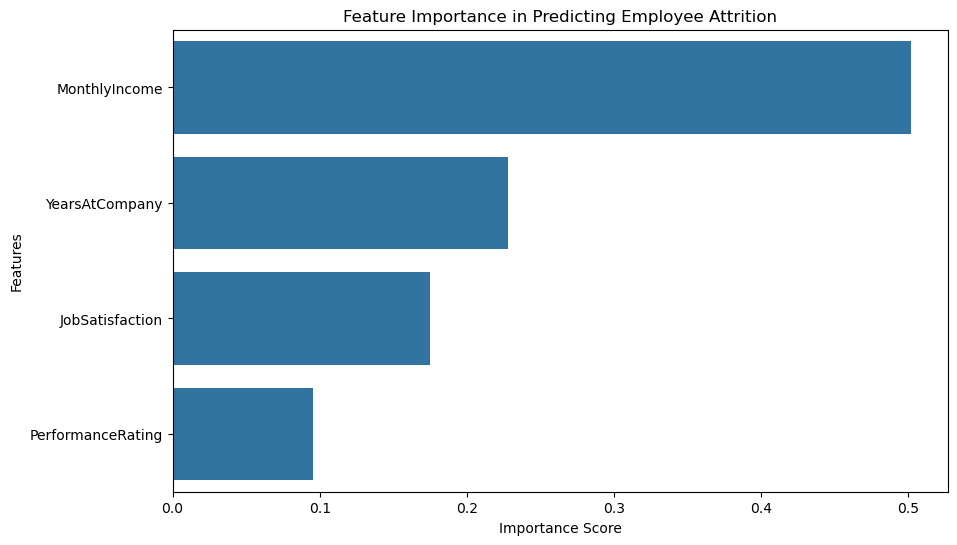

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Generate a Realistic HR Dataset ---
    # No download needed! We create the data to match the assignment's goal.
    np.random.seed(42)
    num_employees = 1000

    # Generate features
    job_satisfaction = np.random.randint(1, 6, num_employees) # Scale of 1 to 5
    performance_rating = np.random.randint(1, 5, num_employees) # Scale of 1 to 4
    years_at_company = np.random.randint(1, 21, num_employees)
    monthly_income = np.random.randint(2500, 15000, num_employees)

    # Create a DataFrame
    df = pd.DataFrame({
        'JobSatisfaction': job_satisfaction,
        'PerformanceRating': performance_rating,
        'YearsAtCompany': years_at_company,
        'MonthlyIncome': monthly_income
    })

    # Create the 'Attrition' target based on a logical formula
    # Attrition is more likely with low satisfaction and low income.
    probability = 1 / (1 + np.exp(-( -0.8 * df['JobSatisfaction'] - 0.0002 * df['MonthlyIncome'] + 2 )))
    df['Attrition'] = (probability > np.random.rand(num_employees)).astype(int) # 1 = Yes, 0 = No

    print("--- Step 1: Synthetic HR Data Generated Successfully ---")
    print(df.head())
    print("\nAttrition distribution:")
    print(df['Attrition'].value_counts())
    print("\n")

    # --- Data Splitting ---
    X = df.drop('Attrition', axis=1)
    y = df['Attrition']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    
    # --- Step 2: Train the Random Forest Model ---
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    print("--- Step 2: Model Training Complete ---\n")
    
    # --- Step 3: Evaluate and Analyze Feature Importances ---
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print("--- Step 3: Model Evaluation & Feature Analysis ---")
    print(f"Model Accuracy: {accuracy:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['No Attrition', 'Attrition']))

    # Analyze Feature Importances
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Feature Importances:")
    print(feature_importance_df)

    # Visualize the feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance in Predicting Employee Attrition')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.savefig('employee_attrition_feature_importance.png')
    print("\nFeature importance plot saved as 'employee_attrition_feature_importance.png'")
    print("\n--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")